### Use Mini-Batch Gradient Descent to get the  regression line of the following data with one variable

<IPython.core.display.Javascript object>


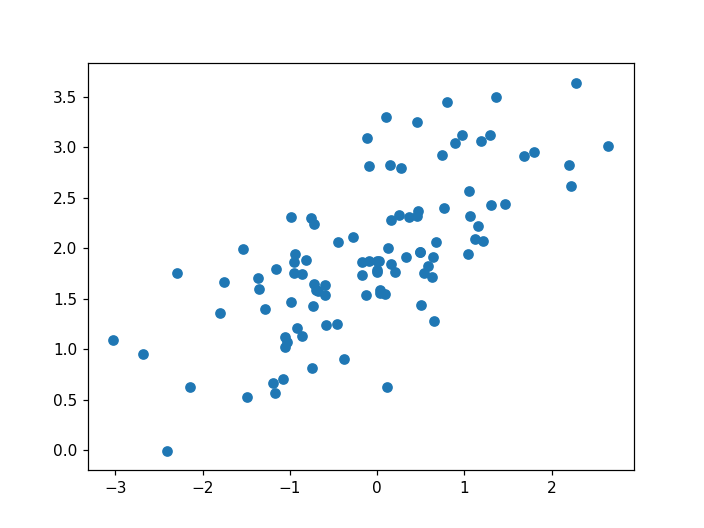

In [5]:
# plot the results
%matplotlib notebook
import matplotlib.pyplot as plt

data = np.loadtxt('data.csv', delimiter = ',')

X = data[:,:-1]
y = data[:,-1]
plt.figure()
plt.scatter(X, y, zorder = 3)
plt.show()

#### Based on the **Mini-batch gradient descent algorithm** belowe  
(Github not rendering the `ipynb` latex properly, you need to have latex on your local, and run this locally to see the formatted equation)

repeat i = 1 : num_iter

$$
\theta_j := \theta_j - \alpha*\frac{1}{b}\sum\limits_{k=i}^{i+b-1} (h_\theta(x^{(k)}) - y^{(k)})*x_j^{(k)} \\
for\ every\ j\ = \ 0,...n
$$

where

\begin{align}
\alpha & =  leaerning\ rate \\
b & = batch\ size \\
h_\theta & = hypothesis\ function \\
x_j^{(k)} & = value\ of\ feature\ j\ in\ the\ i^{th}\ training\ example
\end{align}

In our one variable scenario below, the above j will be 1, so $b = \theta_0$ and $W = \theta_1$

<IPython.core.display.Javascript object>


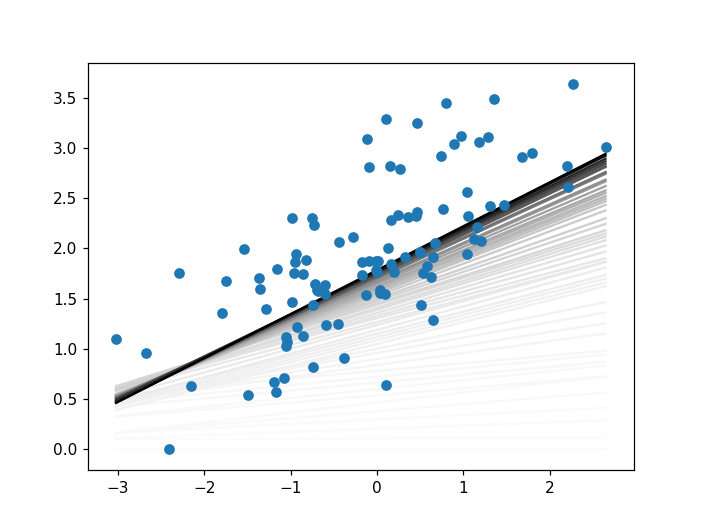

In [12]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(2)

def MSEStep(X, y, W, b, learn_rate = 0.005, batch_size = 20):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Fill in code
    
     # compute errors
    y_pred = np.matmul(X, W) + b
    error = y_pred - y
    
    # compute steps
    W_new = W - learn_rate * np.matmul(error, X)/batch_size
    b_new = b - learn_rate * error.sum()/batch_size
    return W_new, b_new

# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.05, num_iter = 50):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
   
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate, batch_size)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('data.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()

Note, the above algorithm is a little bit different from the solution given by the Udacity, I increased the `learn_rate` & `num_iter`, but in `MSEStep` I divided the result by `batch_size` based on the pseudocode on top. Essentially they are the same, you can found both the `udacity_solution` and `my_solution` in the code base